# Import Packages

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

## Import Data

In [5]:
df = pd.read_csv("../data/combined.csv", index_col = "Unnamed: 0")

In [6]:
df["target"] = pd.get_dummies(df["subreddit"], drop_first=True)

In [7]:
df["target"].value_counts(normalize = True)

1    0.500305
0    0.499695
Name: target, dtype: float64

# Model Building

## Define Functions

In [8]:
def fit_model(model, X, y):
    
    # Train-test-split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Best parameters
    print(f"Best Parameters: {model.best_params_}")
    print("")

    # Scores
    print(f"Best Model Score: {model.best_score_}")
    print(f"Model Train Score: {model.score(X_train, y_train)}")
    print(f"Model Test Score: {model.score(X_test, y_test)}")
    print("")
    
    # Confusion Matrix
    print("Confusion Matrix:")

    y_preds = model.predict(X_test)
    con_mat = confusion_matrix(y_test, y_preds)
    
    print(con_mat)
    
    return model, model.score(X_train, y_train), model.score(X_test, y_test), con_mat

# Logistic Regression Models

### Logistic Regression and Count Vectorizer

In [9]:
# Set features
X = df["title"]
y = df["target"]

In [10]:
# Instantiate a Pipeline to examine CV and LogReg
pipe_cv = Pipeline([
    ("cvec", CountVectorizer()),
    ("lr", LogisticRegression(solver = "lbfgs"))
])

# Search over hyperparameters
cv_params = {
    "cvec__max_features" : [2000, 2500, 3000],
    "cvec__stop_words" : ["english", None],
    "cvec__min_df" : [1, 2],
    "cvec__max_df" : [.8, .9],
    "cvec__ngram_range" : [(1, 1), (1, 2)]
}

# Instantiate GridSearchCV
grid_cv = GridSearchCV(pipe_cv,
                       cv_params,
                       cv = 3)

In [11]:
# Get metrics
model_lrcv, lrcv_train, lrcv_test, con_mat_lrcv = fit_model(grid_cv, X, y)

# Save best LR-CV model
cv_lr = model_lrcv.best_estimator_

//anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Best Parameters: {'cvec__max_df': 0.8, 'cvec__max_features': 3000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english'}

Best Model Score: 0.7045577862181226
Model Train Score: 0.8421052631578947
Model Test Score: 0.7034174125305126

Confusion Matrix:
[[879 349]
 [380 850]]


### Logistic Regression and TFIDF

In [12]:
# Instantiate a Pipeline to examine TFIDF and LogReg
pipe_tf = Pipeline([
    ("tf", TfidfVectorizer()),
    ("lr", LogisticRegression(solver = "lbfgs"))
])

# Search over hyperparameters
tf_params = {
    "tf__max_features" : [4000, 4500, 5000],
    "tf__stop_words" : ["english", None],
    "tf__ngram_range" : [(1, 1), (1, 2)]
}

# Instantiate GridSearchCV
grid_tf = GridSearchCV(pipe_tf,
                       tf_params,
                       cv = 3)

In [13]:
# Fit model
model_lrtf, lrtf_train, lrtf_test, con_mat_lrtf = fit_model(grid_tf, X, y)

# Save best LR-CV model
tf_lr = model_lrtf.best_estimator_

Best Parameters: {'tf__max_features': 5000, 'tf__ngram_range': (1, 2), 'tf__stop_words': 'english'}

Best Model Score: 0.7154096581660336
Model Train Score: 0.8267769940314704
Model Test Score: 0.7127746135069162

Confusion Matrix:
[[872 356]
 [350 880]]


# Naive Bayes Models

### Bernoulli Naive Bayes and Count Vectorizer

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

# Examine Bernoulli with Count Vectorizer
bnb = BernoulliNB()
cvec = CountVectorizer()

X_train = cvec.fit_transform(X_train)
X_test = cvec.transform(X_test)
bnb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [15]:
# Print Train and Test scores
print(f"Model Train Score: {bnb.score(X_train, y_train)}")
print(f"Model Test Score: {bnb.score(X_test, y_test)}")
print("")
print("Confusion Matrix:")
bnb_train = bnb.score(X_train, y_train)
bnb_test = bnb.score(X_test, y_test)

y_preds = bnb.predict(X_test)
con_mat_bnb = confusion_matrix(y_test, y_preds)
print(con_mat_bnb)

Model Train Score: 0.8492946283233858
Model Test Score: 0.7205044751830757

Confusion Matrix:
[[883 345]
 [342 888]]


### Multinomial Naive Bayes and TFIDF

In [16]:
# Reset the train test split that we changed in the last model
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 42,
                                                    stratify = y)

In [17]:
# Examine Bernoulli with TFIDF
mnb = MultinomialNB()
tf = TfidfVectorizer()

X_train = tf.fit_transform(X_train)
X_test = tf.transform(X_test)
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
# Print Train and Test scores
print(f"Model Train Score: {mnb.score(X_train, y_train)}")
print(f"Model Test Score: {mnb.score(X_test, y_test)}")
print("")
print("Confusion Matrix:")
mnb_train = mnb.score(X_train, y_train)
mnb_test = mnb.score(X_test, y_test)

y_preds = mnb.predict(X_test)
con_mat_mnb = confusion_matrix(y_test, y_preds)
print(con_mat_mnb)

Model Train Score: 0.855127509495388
Model Test Score: 0.6977217249796582

Confusion Matrix:
[[719 509]
 [234 996]]


# Column Transform Logistic Regression

### With Column Transform (Logistic Regression and TFIDF)

In [19]:
# Set features
X = df.drop(["target", "subreddit", "domain", "lem_title", "stem_title"], axis = 1)
y = df["target"]

In [20]:
ct = ColumnTransformer([("tf", TfidfVectorizer(), "title")], remainder = "passthrough")

pipe = Pipeline([
    ("ct", ct),
    ("lr", LogisticRegression(solver = "lbfgs"))
])

# Search over hyperparameters
params = {
    "ct__tf__max_features" : [4000, 4500, 5000],
    "ct__tf__stop_words" : ["english", None],
    "ct__tf__ngram_range" : [(1, 1), (1, 2)]
}

# Instantiate GridSearchCV
grid = GridSearchCV(pipe,
                    params,
                    scoring = "accuracy",
                    cv = 3)

In [21]:
# Fit new model
model_ct_lrtf, ct_lrtf_train, ct_lrtf_test, con_mat_ct_lrtf = fit_model(grid, X, y)

//anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Best Parameters: {'ct__tf__max_features': 4500, 'ct__tf__ngram_range': (1, 2), 'ct__tf__stop_words': 'english'}

Best Model Score: 0.6705100379815518
Model Train Score: 0.7821486706456864
Model Test Score: 0.7164361269324654

Confusion Matrix:
[[927 301]
 [396 834]]


The inclusion of all non-title parameters does not improve the model. Continue to test Lemmatized and Stemmed titles to check for improvement.

# NLP Shortened Titles

### Test Lemmatized Titles

In [22]:
# Set features
X = df["lem_title"]
y = df["target"]

# Get new train-test-split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 42,
                                                    stratify = y)

# Examine Bernoulli with Count Vectorizer
bnb_lem = BernoulliNB()
cvec = CountVectorizer()

X_train = cvec.fit_transform(X_train)
X_test = cvec.transform(X_test)
bnb_lem.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [23]:
# Print Train and Test scores
print(f"Model Train Score: {bnb_lem.score(X_train, y_train)}")
print(f"Model Test Score: {bnb_lem.score(X_test, y_test)}")
print("")
print("Confusion Matrix:")
bnb_lem_train = bnb_lem.score(X_train, y_train)
bnb_lem_test = bnb_lem.score(X_test, y_test)

y_preds = bnb_lem.predict(X_test)
con_mat_lem = confusion_matrix(y_test, y_preds)
print(con_mat_lem)

Model Train Score: 0.8392566467715681
Model Test Score: 0.7164361269324654

Confusion Matrix:
[[877 351]
 [346 884]]


697 missed guesses. Our full title is better than the lemmatized title.

### Test Stemmed Titles

In [24]:
# Set features
X = df["stem_title"]
y = df["target"]

# Get new train-test-split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 42,
                                                    stratify = y)

# Examine Bernoulli with Count Vectorizer
bnb_stem = BernoulliNB()
cvec = CountVectorizer()

X_train = cvec.fit_transform(X_train)
X_test = cvec.transform(X_test)
bnb_stem.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [25]:
# Print Train and Test scores
print(f"Model Train Score: {bnb_stem.score(X_train, y_train)}")
print(f"Model Test Score: {bnb_stem.score(X_test, y_test)}")
print("")
print("Confusion Matrix:")
bnb_stem_train = bnb_stem.score(X_train, y_train)
bnb_stem_test = bnb_stem.score(X_test, y_test)

y_preds = bnb_stem.predict(X_test)
con_mat_stem = confusion_matrix(y_test, y_preds)
print(con_mat_stem)

Model Train Score: 0.8300325556158438
Model Test Score: 0.7205044751830757

Confusion Matrix:
[[881 347]
 [340 890]]


687 missed guesses. Our stemmed titles are just as effective as our full titles, but have a slightly reduced overfitness.

In [26]:
model_lrcv.best_params_

{'cvec__max_df': 0.8,
 'cvec__max_features': 3000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english'}

# Decision Tree Models

### Voting Classifier with AdaBoostClassifier, GradientBoostingClassifier, and DecisionTreeClassifier

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

vote = VotingClassifier([
    ('ada', AdaBoostClassifier(base_estimator=DecisionTreeClassifier())),
    ('gb', GradientBoostingClassifier()),
    ('tree', DecisionTreeClassifier())
])


pipe = Pipeline([
    ("cv", CountVectorizer()),
    ("vote", vote)
])


pipe_params = {
    "cv__max_features" : [3000, 5000],
    "vote__ada__n_estimators" : [45, 55],
    "vote__ada__base_estimator__max_depth" : [1, 3]
}

gs = GridSearchCV(pipe,
                  pipe_params,
                  cv = 3)

gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cv',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                              

In [28]:
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))

y_preds = gs.predict(X_test)
confusion_matrix(y_test, y_preds)

0.8247422680412371
0.692432872253865


array([[917, 311],
       [445, 785]])

# Create Visualizations

Models:
1. Logistic Regression Count Vectorizer
2. Logistic Regression Term Frequency: Inverse Document Frequency
3. Bernoulli Naive Bayes Count Vectorizer 
4. Multinomial Naive Bayes Term Frequency: Inverse Document Frequency
5. Column Transformer LR Term Frequency: Inverse Document Frequency
6. Bernoulli Naive Bayes Lem
7. Bernoulli Naive Bayes Stem

In [29]:
# Score Dictionary
scores = {
    "LR-CV" : [lrcv_train, lrcv_test, "LR-CV"],
    "LR-TFIDF": [lrtf_train, lrtf_test, "LR-TFIDF"],
    "BNB-CV" : [bnb_train, bnb_test, "BNB-CV"],
    "MNB-TFIDF" : [mnb_train, mnb_test, "MNB-TFIDF"],
    "CT-LR-TFIDF" : [ct_lrtf_train, ct_lrtf_test, "CT-LR-TFIDF"],
    "BNB-Lem" : [bnb_lem_train, bnb_lem_test, "BNB-Lem"],
    "BNB-Stem" : [bnb_stem_train, bnb_stem_test, "BNB-Stem"]
}

In [30]:
# Create DataFrame of scores
scores_df = pd.DataFrame.from_dict(scores, orient = "index", columns = ["train_score", "test_score", "model_type"])

### Barplot

In [31]:
# Create Boxplot DataFrame
bp = pd.DataFrame(data = scores.keys(), columns = ["model_type"])
bp = pd.concat([bp, bp])

In [32]:
# Get lists of training and testing scores
trains = []
tests = []
for row in bp["model_type"]:
    trains.append(scores[row][0])
    tests.append(scores[row][1])
    
# Create a DataFrame for training vs testing values
trains = pd.DataFrame(trains)
tests = pd.DataFrame(tests)

trains = trains[:7]
tests = tests[:7]

# Create Scores column with training and testing scores
bp["scores"] = 0
bp["scores"] = pd.concat([trains, tests])

# Create Score column with labels for scores
bp["score"] = 0
bp["score"][:7] = "train"
bp["score"][7:] = "test"

//anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
//anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


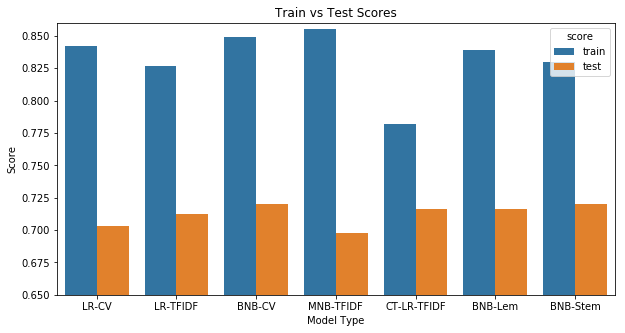

In [33]:
plt.figure(figsize = (10, 5))
sns.barplot(data = bp, x = "model_type", y = "scores", hue = "score")
plt.title("Train vs Test Scores")
plt.ylim(.65, .86)
plt.xlabel("Model Type")
plt.ylabel("Score")
plt.savefig("../images/model_scores.png")

### Visualize Over/Under Fitness

In [34]:
# Create a column with differences
scores_df["dif"] = scores_df["train_score"] - scores_df["test_score"]

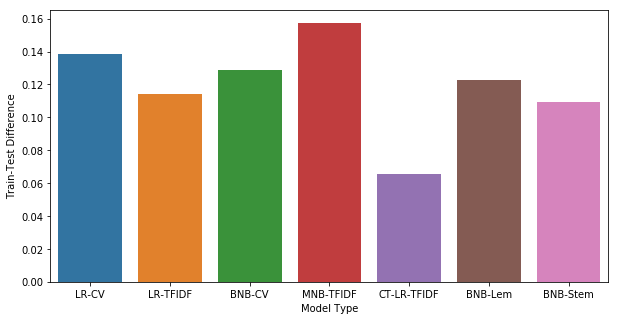

In [35]:
plt.figure(figsize = (10, 5))
sns.barplot(x = "model_type", y = "dif", data = scores_df)
plt.xlabel("Model Type")
plt.ylabel("Train-Test Difference")
plt.savefig("../images/model_fit.png")